In [1]:
#Ensemble 3 Models in VGG. 
#Model 1 -> ZCA + FeatureWise
#Model 2 -> Only Featurewise Normalization 
#Model 3  -> None of the above

In [2]:
import os
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print('GPU device not found')
print('Found GPU at: {}'.format(device_name))
device_name
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical


Found GPU at: /device:GPU:0


In [3]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, AveragePooling2D, GlobalAveragePooling2D

In [4]:
train_ds = np.load('E:/Kaggle2/train.npz')

In [5]:
x = train_ds['arr_0']
y = train_ds['arr_1']

x = x.reshape(1500,28,28,1)
print(y.shape)

#import numpy, scipy.sparse
#from scipy.sparse import csr_matrix
#Asp = scipy.sparse.csr_matrix(x)
#print(type(Asp))

#M=sparse.coo_matrix(x)

(1500,)


In [6]:
train_images = x 

In [7]:
train_labels = y

In [8]:
#Deep Learning
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers as L
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img

def change_size(image):
    img = array_to_img(image, scale=False) #returns PIL Image
    img = img.resize((75, 75)) #resize image
    img = img.convert(mode='RGB') #makes 3 channels
    arr = img_to_array(img) #convert back to array
    return arr.astype(np.float64)

In [10]:
train_arr_75 = [change_size(img) for img in x]
del x
train_arr_75 = np.array(train_arr_75)
train_arr_75.shape
y = to_categorical(y)

In [11]:
from tensorflow.keras.applications.vgg16 import preprocess_input
#from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
#from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
#print("BEFORE PREPROCESS:")
#print(train_arr_75)
train_arr_75 = preprocess_input(train_arr_75)
train_arr_75 = np.array(train_arr_75)
train_arr_75 = train_arr_75.astype('float32')
train_arr_75 /= 255

train_images, test_images, train_labels, test_labels = train_test_split(train_arr_75,y, test_size=0.1, random_state=1, stratify=y)

#Model1
image_gen1 = ImageDataGenerator(
    #samplewise_center=True, don't
    #featurewise_center=True, don't
    #featurewise_std_normalization=True, don't
    #samplewise_std_normalization = True,# accuracy -0.83, better confusion on class4
    #zca_whitening = True,
        zoom_range=0.2, # randomly zoom into images
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        #20 - 0.836
        width_shift_range=0.3,  # randomly shift images horizontally (fraction of total width)
        #0.1-  0.823, 0.4 - 0.73, 0.3-0.86
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        #0.3-0.77
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

train_generator = image_gen1.flow(train_images, 
                                 train_labels,
                                batch_size=32,
                                shuffle=True,
                                seed=42)
valid_generator = image_gen1.flow(test_images,
                                 test_labels,
                                batch_size=16,
                                shuffle=True)

#print(train_arr_75)
#del train_arr_75 #saves RAM

In [12]:
# example of loading the inception v3 model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.xception import Xception
#from classification_models.resnet import ResNet18, preprocess_input
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
#from tensorflow.keras.layers.normalization import BatchNormalization
import math 
def kaiming(shape, dtype=None):
    return tf.random.normal(shape, dtype=dtype)*math.sqrt(2./shape[0])

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

from tensorflow.keras.layers import Input

model = Sequential()
input_tensor = Input(shape=(75, 75, 3))
model = VGG16(weights = "imagenet",include_top=False, input_shape=(75, 75, 3))
#model = ResNet18(input_shape=(224,224,3), weights='imagenet', classes=1000)
# add new classifier layers
flat1 = Flatten()(model.layers[-1].output)
x2 = Dropout(.1)(flat1)
class1 = Dense(1024, activation='relu')(x2)
x2 = Dropout(.5)(class1)
output = Dense(6, activation='softmax')(class1)
model = Model(inputs=model.inputs, outputs=output)
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
#Do not use default learning rate since it is too high!
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0     

In [22]:
model2 = Sequential()
input_tensor = Input(shape=(75, 75, 3))
model2 = VGG16(weights = "imagenet",include_top=False, input_shape=(75, 75, 3))
#model = ResNet18(input_shape=(224,224,3), weights='imagenet', classes=1000)
# add new classifier layers
flat1 = Flatten()(model2.layers[-1].output)
x2 = Dropout(.1)(flat1)
class1 = Dense(1024, activation='relu')(x2)
x2 = Dropout(.5)(class1)
output = Dense(6, activation='softmax')(class1)
model2 = Model(inputs=model2.inputs, outputs=output)
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
#Do not use default learning rate since it is too high!
print(model2.summary())

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 75, 75, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 75, 75, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 75, 75, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 37, 37, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 37, 37, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 37, 37, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 18, 18, 128)       0   

In [23]:
model.load_weights('Ensemble_test_Model_1.hdf5')

In [25]:
model2.load_weights('Ensemble_test_Model_2.hdf5')

In [26]:
test_ds = np.load('E:/Kaggle2/test.npz')

In [27]:
y2 = test_ds['arr_0']
y2 = y2.reshape(60000,28,28,1)
#y2 = [change_size(img) for img in y2]
#y2 = preprocess_input(y2)


#y2 = np.array(y2)
#y2 = y2.astype('float32')
#y2 /= 255

In [28]:
y2 = np.array([change_size(img) for img in y2])

In [29]:
y2.shape

(60000, 75, 75, 3)

In [30]:
y2 = np.float32(y2)

In [31]:
y2 = preprocess_input(y2)

In [32]:
y2 = np.array(y2)

In [33]:
y2 = y2.astype('float32')

In [34]:
y2 /= 255

In [35]:
results = np.zeros( (y2.shape[0],6) ) 

In [37]:
results = results + model.predict(y2)

In [38]:
results = results + model2.predict(y2)

In [39]:
results = np.argmax(results,axis = 1)

In [40]:
results

array([2, 2, 4, ..., 5, 2, 2], dtype=int64)

In [41]:
import pandas as pd
t_dataframe=pd.DataFrame(results, columns=['Category']) 

In [42]:
t_dataframe["Id"] = t_dataframe.index

Accuracy Score is displayed below:
0.8866666666666667


array([[22,  1,  0,  1,  1,  0],
       [ 0, 20,  0,  1,  4,  0],
       [ 0,  0, 24,  0,  1,  0],
       [ 0,  0,  0, 24,  0,  1],
       [ 0,  0,  0,  3, 21,  1],
       [ 0,  0,  0,  0,  3, 22]], dtype=int64)

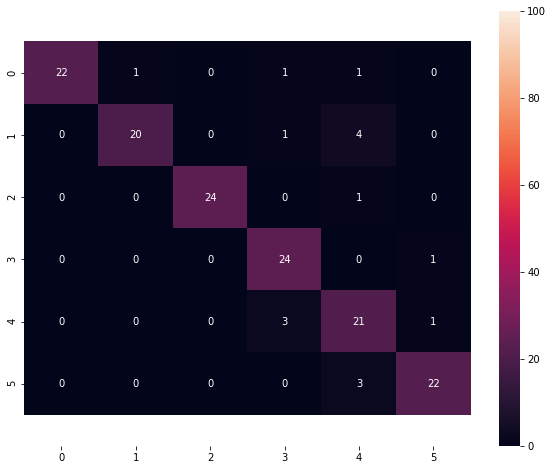

In [43]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

results = np.zeros( (test_images.shape[0],6) ) 
results = results + model.predict(test_images)
results = results + model2.predict(test_images)
results = np.argmax(results,axis = 1)
Y_val_pred = results


test_labels = np.argmax(test_labels, axis = 1)
cf_matrix = confusion_matrix(test_labels, Y_val_pred)
print("Accuracy Score is displayed below:")

print(accuracy_score(test_labels, Y_val_pred))
categories = list(np.unique(test_labels))
df_cm = pd.DataFrame(cf_matrix,index = categories,
  columns = categories)
plt.figure(figsize=(10,8))
res = sns.heatmap(df_cm, annot=True, vmin=0.0, vmax=100.0)
bottom, top = res.get_ylim()
res.set_ylim(bottom + 0.5, top - 0.5)
cf_matrix

In [44]:
columns_titles = ["Id","Category"]
t_dataframe=t_dataframe.reindex(columns=columns_titles)

In [45]:
t_dataframe.to_csv("E:/kaggleVGGMerge.csv", index = False)